In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from bokeh.plotting import figure, show, output_file

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
suggested = pd.read_csv(os.path.join(project_root,'exp_result', 'exp_1_Dilyar.csv'))
baseline = pd.read_csv(os.path.join(project_root,'exp_result', 'exp_1-baseline_Dilyar.csv'))


In [147]:
print(project_root)
print(os.path.join(project_root,'exp_result', 'exp_1_Dilyar.csv'))

/home/botgod/Git/Hub/seminarcode
/home/botgod/Git/Hub/seminarcode/exp_result/exp_1_Dilyar.csv


In [148]:
suggested.columns

Index(['test_path', ' alpha', ' beta', ' total_weighted_sum',
       ' total_computation_time', ' total_pred_time', ' total_opti_time',
       ' self.precision*100 '],
      dtype='object')

In [149]:
baseline.columns

Index(['Baseline test_path', ' total_weighted_sum',
       ' total_computation_time '],
      dtype='object')

In [150]:
# print the unique values in the column test_path in suggested dataframe
print(suggested['test_path'].unique())

['./sample_data/artificial/testlog_0806_1_90.csv'
 './sample_data/artificial/testlog_0806_1_40.csv'
 './sample_data/artificial/testlog_0806_1_60.csv'
 './sample_data/artificial/testlog_0806_1_80.csv'
 './sample_data/artificial/testlog_0806_1_100.csv'
 './sample_data/artificial/testlog_0806_1_120.csv'
 './sample_data/artificial/testlog_0806_1_140.csv']


In [151]:
# create a new df for each unique value in the column test_path
# and append it to the list
suggested_list = {}
for i in suggested['test_path'].unique():
    suggested_list[i]= suggested[suggested['test_path'] == i]
baseline_list = {}
for i in baseline['Baseline test_path'].unique():
    baseline_list[i]= baseline[baseline['Baseline test_path'] == i]


In [152]:
def compare_methods(suggested, baseline):
  percentage_change = (suggested - baseline) / baseline * 100
  if percentage_change > 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    return f"{-percentage_change:.2f}%"
  elif percentage_change < 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    return f"{-percentage_change:.2f}%"
  else:
    #print("suggested and baseline are equally good")
    return f"0%"


In [153]:
def compare_methods_int(suggested, baseline):
  percentage_change = (suggested - baseline) / baseline * 100
  if percentage_change > 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    # return only first two digts of the percentage change in int
    return int(-percentage_change)
  elif percentage_change < 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    return int(-percentage_change)
  else:
    #print("suggested and baseline are equally good")
    return 0

In [154]:
#rename the keys of the suggested_list
suggested_list = {k.split('/')[-1].split('.')[0].split('_')[-1]: v for k, v in suggested_list.items()}

In [155]:
baseline_list = {k.split('/')[-1].split('.')[0].split('_')[-1]: v for k, v in baseline_list.items()}

In [156]:
print(baseline_list.keys())

dict_keys(['90', '40', '60', '80', '100', '120', '140'])


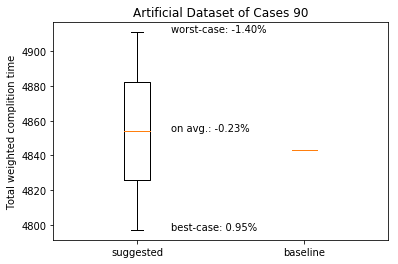

best case: 

worst case: 

avg case: 



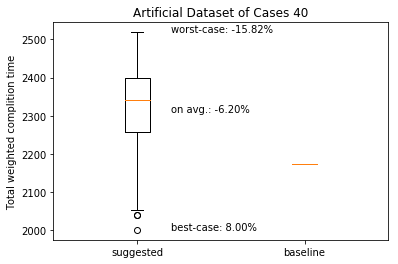

best case: 

worst case: 

avg case: 



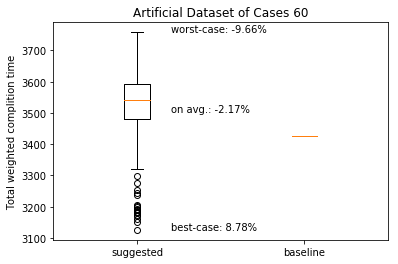

best case: 

worst case: 

avg case: 



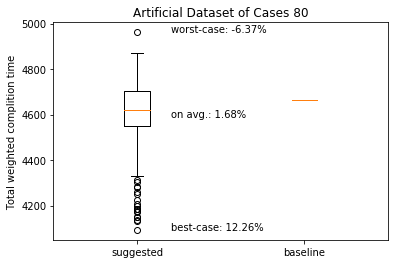

best case: 

worst case: 

avg case: 



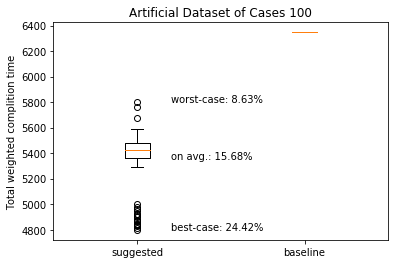

best case: 

worst case: 

avg case: 



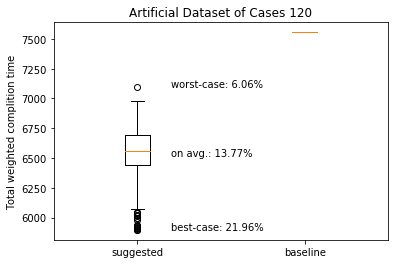

best case: 

worst case: 

avg case: 



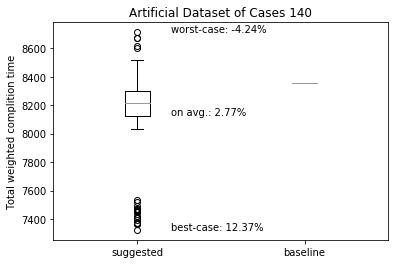

best case: 

worst case: 

avg case: 



In [157]:
best_case = {}
worst_case = {}
avg_case = {}
# for each key value pair in the dictionary, create a boxplot
for key, value in suggested_list.items():
    plt.figure()
    plt.title('Artificial Dataset of Cases' + " " + key)
    plt.boxplot([value[' total_weighted_sum'], baseline_list[key][' total_weighted_sum']])
    
    plt.xticks([1,2], ['suggested', 'baseline'])
    # name the y column to Total weighted complition time
    plt.ylabel('Total weighted complition time')
    # add text to the botom of the plot
    plt.text(1.2, value[' total_weighted_sum'].min(), 'best-case: ' + compare_methods(value[' total_weighted_sum'].min(), float(baseline_list[key][' total_weighted_sum'])))

    plt.text(1.2, value[' total_weighted_sum'].max(), 'worst-case: ' + compare_methods(value[' total_weighted_sum'].max(), float(baseline_list[key][' total_weighted_sum'])))

    plt.text(1.2, value[' total_weighted_sum'].mean(), 'on avg.: ' + compare_methods(value[' total_weighted_sum'].mean(), float(baseline_list[key][' total_weighted_sum'])))
    # save the plot
    plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'artifical', key + '.png'))
    plt.show()
    
    
    # calculate the best case and the worst case for the suggested incomparison to baseline in terms of percentage
    print('best case: \n')
    best_case[key] = compare_methods_int(value[' total_weighted_sum'].min(), float(baseline_list[key][' total_weighted_sum']))
    print('worst case: \n')
    worst_case[key] = compare_methods_int(value[' total_weighted_sum'].max(), float(baseline_list[key][' total_weighted_sum']))
    print('avg case: \n')
    avg_case[key] = compare_methods_int(value[' total_weighted_sum'].mean(), float(baseline_list[key][' total_weighted_sum']))
    
    #best_case = (value[' total_weighted_sum'].min() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    #worst_case = (value[' total_weighted_sum'].max() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    #avg_case = (value[' total_weighted_sum'].mean() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    #print('best case: ', best_case)
    #print('worst case: ', worst_case)
    #print('avg case: ', avg_case)
    # print the alpha and beta values for the best case, worst case 
    
    #print('best case alpha: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].min()][' alpha'].values[0])
    #print('best case beta: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].min()][' beta'].values[0])
    #print('worst case alpha: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].max()][' alpha'].values[0])
    #print('worst case beta: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].max()][' beta'].values[0])
    
    

In [158]:
# create box plots from the column total_weighted_sum in the dataframe suggested where the test path is the same as the one in the baseline dataframe
#plt.boxplot(suggested[' total_weighted_sum'])
#plt.show()

In [159]:
print(worst_case)

{'90': -1, '40': -15, '60': -9, '80': -6, '100': 8, '120': 6, '140': -4}


In [160]:

# add data points to each xtick from ['40', '60', '80', '100', '120', '140'] 
xticks = ['40', '60', '80', '100', '120', '140']
worst_case_line = []
best_case_line = []
avg_case_line = []
for i in xticks:
    worst_case_line.append(int(worst_case[i]))
    best_case_line.append(best_case[i])
    avg_case_line.append(avg_case[i])


In [161]:
print(worst_case_line)
print(best_case_line)
print(avg_case_line)

[-15, -9, -6, 8, 6, -4]
[8, 8, 12, 24, 21, 12]
[-6, -2, 1, 15, 13, 2]


FileNotFoundError: [Errno 2] No such file or directory: '/home/botgod/Git/Hub/seminarcode/plots/lineplots/artifical/artifical.png'

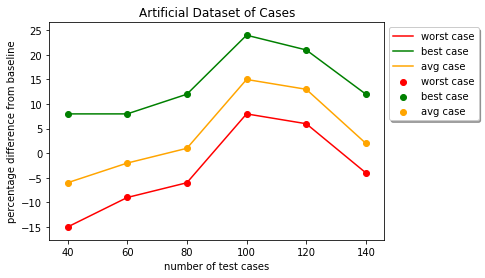

In [167]:
# create a line plot for the best case, worst case and average case
plt.figure()
plt.title('Artificial Dataset of Cases')

plt.plot(xticks, worst_case_line, label='worst case', color='red')
plt.plot(xticks, best_case_line, label='best case', color='green')
plt.plot(xticks, avg_case_line, label='avg case', color='orange')

plt.scatter(xticks, worst_case_line, label='worst case', color='red')
plt.scatter(xticks, best_case_line, label='best case', color='green')
plt.scatter(xticks, avg_case_line, label='avg case', color='orange')


plt.xlabel('number of test cases')
plt.ylabel('percentage difference from baseline')
plt.legend(shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(project_root, 'plots', 'lineplots', 'artifical', 'artifical.png'))

plt.show()


    




